# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Camilo José Alape Herrera
*   Alumno 2: Jonathan Catota







---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jul 13 22:13:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
Archivos en el directorio: 
['dqn_SpaceInvaders-v0_dueling_double.h5f.data-00000-of-00001', 'dqn_SpaceInvaders-v0_dueling_double.h5f.index', 'dqn_SpaceInvaders-v0_refined_weights_100000.h5f.data-00000-of-00001', 'dqn_SpaceInvaders-v0_refined_weights_100000.h5f.index', 'dqn_SpaceInvaders-v0_refined_log.json', 'boltzmann_weights.h5f.data-00000-of-00001', 'boltzmann_weights.h5f.index', 'boltzmann_log.json', 'double_weights.h5f.data-00000-of-00001', 'double_weights.h5f.index', 'double_log.json', 'dueling_weights.h5f.data-00000-of-00001', 'dueling_w

---
### 1.4. Instalar librerías necesarias

In [ ]:
if IN_COLAB:
  %pip install numpy==1.18.5
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12
  %pip install keras==2.12.0
  %pip install atari_py==1.2.2
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

  Using cached numpy-1.18.5.zip (5.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-igv925_7
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-igv925_7
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done
  Created wheel for at

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [ ]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers.legacy import Adam
#from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
print("Numero de acciones disponibles:" + str(nb_actions))

In [ ]:
print("Formato de las observaciones:")
env.observation_space

In [ ]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

1. Implementación de la red neuronal

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Permute
from keras import Input

INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4  # Número de frames apilados

model = Sequential()

# Reordenar dimensiones para que Conv2D funcione: (C, H, W) -> (H, W, C)
model.add(Permute((2, 3, 1), input_shape=(WINDOW_LENGTH,) + INPUT_SHAPE))  # (4, 84, 84) -> (84, 84, 4)

# Arquitectura tipo DeepMind
model.add(Conv2D(32, kernel_size=8, strides=4, activation='relu'))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)                 3

2. Implementación de la solución DQN

In [ ]:
import numpy as np
import gym
import json
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Permute
from tensorflow.keras.optimizers.legacy import Adam  # ✅ IMPORTANTE: usar legacy
from tensorflow.keras import backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# ==== Constantes ====
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
ENV_NAME = 'SpaceInvaders-v0'

# ==== Procesador para observaciones ====
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# ==== Preparar entorno ====
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# ==== Modelo CNN tipo DeepMind ====
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=input_shape))  # (4, 84, 84) → (84, 84, 4)
model.add(Conv2D(32, kernel_size=8, strides=4, activation='relu'))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))

# ==== Memoria y política ====
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1.0, value_min=0.1, value_test=0.05,
                              nb_steps=1000000)

# ==== Agente DQN ====
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               memory=memory,
               processor=AtariProcessor(),
               nb_steps_warmup=50000,
               target_model_update=10000,
               train_interval=4,
               gamma=0.99,
               policy=policy)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

# ==== Callbacks ====
checkpoint_weights_filename = 'dqn_{}_weights_{{step}}.h5f'.format(ENV_NAME)
log_filename = 'dqn_{}_log.json'.format(ENV_NAME)
callbacks = [
    ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
    FileLogger(log_filename, interval=100)
]

# ==== Entrenamiento ====
dqn.fit(env,
        nb_steps=1000000,  # ENTRENAMIENTO EXTENDIDO
        visualize=False,
        verbose=2,
        callbacks=callbacks)

# ==== Guardar pesos finales ====
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# ==== Evaluación ====
dqn.test(env, nb_episodes=20, visualize=False)


Training for 1000000 steps ...
    420/1000000: episode: 1, duration: 1.660s, episode steps: 420, steps per second: 253, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.479 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1131/1000000: episode: 2, duration: 2.686s, episode steps: 711, steps per second: 265, episode reward:  7.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.415 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1941/1000000: episode: 3, duration: 3.202s, episode steps: 810, steps per second: 253, episode reward: 10.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.410 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2827/1000000: episode: 4, duration: 3.374s, episode steps: 886, steps per second: 263, episode reward: 11.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.392 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   3345/1000000: episode: 5, duration: 1.

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50166/1000000: episode: 70, duration: 6.069s, episode steps: 402, steps per second:  66, episode reward:  3.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 2.577 [0.000, 5.000],  loss: 0.008521, mae: 0.044553, mean_q: 0.079231, mean_eps: 0.954924
  51219/1000000: episode: 71, duration: 30.253s, episode steps: 1053, steps per second:  35, episode reward: 24.000, mean reward:  0.023 [ 0.000,  1.000], mean action: 2.459 [0.000, 5.000],  loss: 0.006322, mae: 0.043830, mean_q: 0.064166, mean_eps: 0.954377
  52002/1000000: episode: 72, duration: 22.728s, episode steps: 783, steps per second:  34, episode reward:  9.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.526 [0.000, 5.000],  loss: 0.007343, mae: 0.048120, mean_q: 0.066787, mean_eps: 0.953551
  52754/1000000: episode: 73, duration: 21.555s, episode steps: 752, steps per second:  35, episode reward: 11.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.435 [0.000, 5.000],  loss: 0.006277, mae: 0.045243, mean_

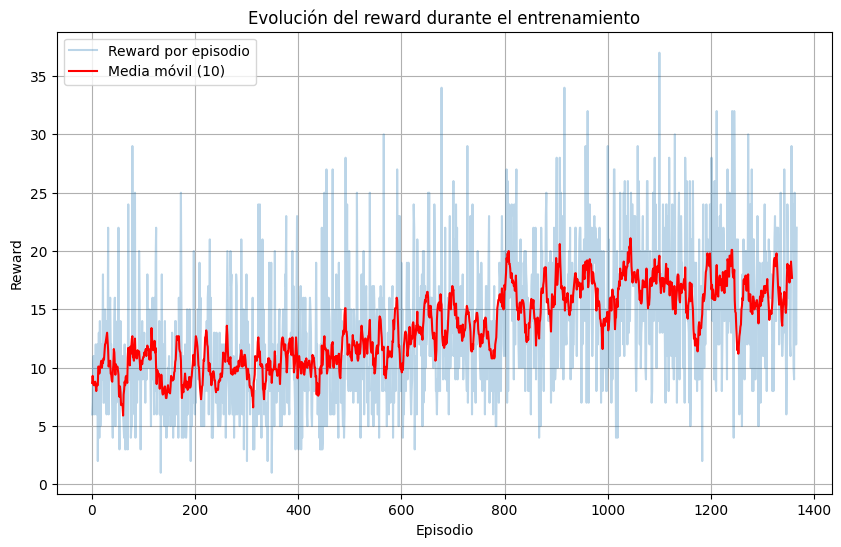

In [ ]:
# Leer los logs guardados
with open(log_filename) as f:
    log_data = json.load(f)

# Extraer rewards y episodios
episode_rewards = log_data['episode_reward']
episodes = list(range(1, len(episode_rewards) + 1))  # Episodios desde 1

# (Opcional) Suavizar la curva con media móvil
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

smoothed_rewards = moving_average(episode_rewards, window_size=10)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(episodes, episode_rewards, alpha=0.3, label='Reward por episodio')
plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, color='red', label='Media móvil (10)')
plt.xlabel('Episodio')
plt.ylabel('Reward')
plt.title('Evolución del reward durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


¿Reducir learning_rate de 0.00025 a 0.0001 mejorará la recompensa promedio y reducirá el tiempo de entrenamiento? En las siguientes lineas de código pro la idea sería estudiar el impacto del learning rate. Cambiar a 0.0001 podría mejorar la estabilidad del aprendizaje, especialmente en entornos visuales como Atari (SpaceInvaders), donde:

La señal de recompensa con un learning rate de 0.00025 puede ser ruidosa

El agente necesita consolidar políticas más lentamente.

In [ ]:
import numpy as np
import gym
import json
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Permute
from tensorflow.keras.optimizers.legacy import Adam  # ✅ IMPORTANTE: usar legacy
from tensorflow.keras import backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# ==== Constantes ====
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
ENV_NAME = 'SpaceInvaders-v0'

# ==== Procesador para observaciones ====
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# ==== Preparar entorno ====
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# ==== Modelo CNN tipo DeepMind ====
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=input_shape))  # (4, 84, 84) → (84, 84, 4)
model.add(Conv2D(32, kernel_size=8, strides=4, activation='relu'))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))

# ==== Memoria y política ====
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1.0, value_min=0.1, value_test=0.05,
                              nb_steps=1000000)

# ==== Agente DQN ====
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               memory=memory,
               processor=AtariProcessor(),
               nb_steps_warmup=50000,
               target_model_update=10000,
               train_interval=4,
               gamma=0.99,
               policy=policy)

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae'])

# ==== Callbacks ====
checkpoint_weights_filename = 'dqn_{}_weights_{{step}}.h5f'.format(ENV_NAME)
log_filename = 'dqn_{}_log.json'.format(ENV_NAME)
callbacks = [
    ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
    FileLogger(log_filename, interval=100)
]

# ==== Entrenamiento ====
dqn.fit(env,
        nb_steps=1000000,  # ENTRENAMIENTO EXTENDIDO
        visualize=False,
        verbose=2,
        callbacks=callbacks)

# ==== Guardar pesos finales ====
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# ==== Evaluación ====
dqn.test(env, nb_episodes=20, visualize=False)


Training for 1000000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    420/1000000: episode: 1, duration: 1.756s, episode steps: 420, steps per second: 239, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.479 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1131/1000000: episode: 2, duration: 2.788s, episode steps: 711, steps per second: 255, episode reward:  7.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.414 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1941/1000000: episode: 3, duration: 3.229s, episode steps: 810, steps per second: 251, episode reward: 10.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.410 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2809/1000000: episode: 4, duration: 3.582s, episode steps: 868, steps per second: 242, episode reward: 11.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.381 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   3622/1000000: episode: 5, duration: 3.821s, episode steps: 813, steps

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50339/1000000: episode: 69, duration: 11.267s, episode steps: 568, steps per second:  50, episode reward:  7.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.548 [0.000, 5.000],  loss: 0.006348, mae: 0.046631, mean_q: 0.076942, mean_eps: 0.954847
  51058/1000000: episode: 70, duration: 21.226s, episode steps: 719, steps per second:  34, episode reward: 11.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.501 [0.000, 5.000],  loss: 0.006464, mae: 0.047347, mean_q: 0.070326, mean_eps: 0.954372
  51854/1000000: episode: 71, duration: 23.415s, episode steps: 796, steps per second:  34, episode reward: 16.000, mean reward:  0.020 [ 0.000,  1.000], mean action: 2.515 [0.000, 5.000],  loss: 0.006974, mae: 0.049637, mean_q: 0.071917, mean_eps: 0.953690
  52443/1000000: episode: 72, duration: 17.187s, episode steps: 589, steps per second:  34, episode reward:  8.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.569 [0.000, 5.000],  loss: 0.006759, mae: 0.049468, mean_

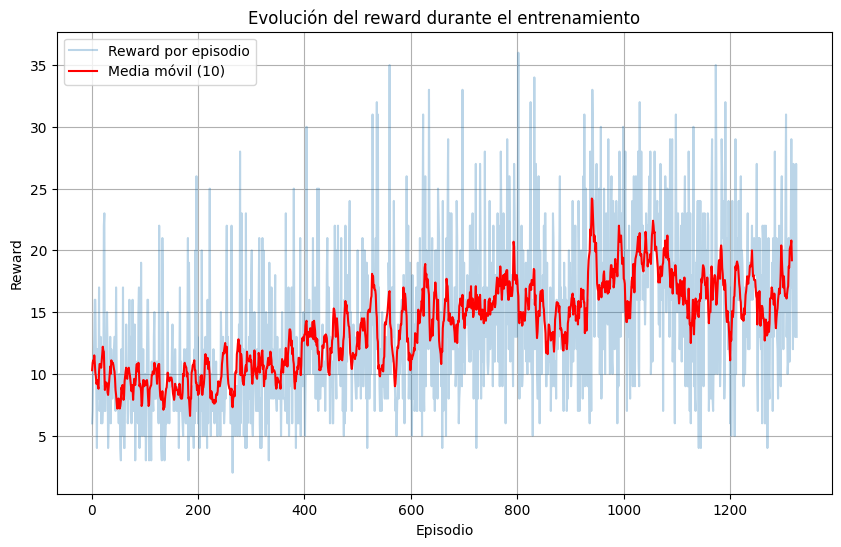

In [ ]:
# Leer los logs guardados
with open(log_filename) as f:
    log_data = json.load(f)

# Extraer rewards y episodios
episode_rewards = log_data['episode_reward']
episodes = list(range(1, len(episode_rewards) + 1))  # Episodios desde 1

# (Opcional) Suavizar la curva con media móvil
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

smoothed_rewards = moving_average(episode_rewards, window_size=10)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(episodes, episode_rewards, alpha=0.3, label='Reward por episodio')
plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, color='red', label='Media móvil (10)')
plt.xlabel('Episodio')
plt.ylabel('Reward')
plt.title('Evolución del reward durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


# Modificación arquitectura de Red Neuronal para mejora del base line
Se introdujo una cuarta capa convolucional para mejorar la capacidad de extracción de características, y se incrementó la dimensión de la capa densa final a 1024 neuronas para mejorar la representación abstracta del estado. Esto permite al agente aprender políticas más complejas, especialmente en entornos visuales de alta dimensionalidad como Atari.

In [ ]:
import numpy as np
import gym
import json
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Permute
from tensorflow.keras.optimizers.legacy import Adam  # ✅ IMPORTANTE: usar legacy
from tensorflow.keras import backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# ==== Constantes ====
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
ENV_NAME = 'SpaceInvaders-v0'

# ==== Procesador para observaciones ====
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# ==== Preparar entorno ====
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# ==== Modelo CNN tipo DeepMind ====
#input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
#model = Sequential()
#model.add(Permute((2, 3, 1), input_shape=input_shape))  # (4, 84, 84) → (84, 84, 4)
#model.add(Conv2D(32, kernel_size=8, strides=4, activation='relu'))
#model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
#model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))
#model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dense(nb_actions, activation='linear'))


# ==== Modelo CNN Mejorado ====
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=input_shape))  # (4, 84, 84) → (84, 84, 4)

# Capas convolucionales
model.add(Conv2D(32, kernel_size=8, strides=4, activation='relu'))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))  # Nueva capa

# Capa densa más profunda
model.add(Flatten())
model.add(Dense(1024, activation='relu'))  # Mayor capacidad
model.add(Dense(nb_actions, activation='linear'))  # Salida


# ==== Memoria y política ====
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1.0, value_min=0.1, value_test=0.05,
                              nb_steps=1000000)

# ==== Agente DQN ====
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               memory=memory,
               processor=AtariProcessor(),
               nb_steps_warmup=50000,
               target_model_update=10000,
               train_interval=4,
               gamma=0.99,
               policy=policy)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

# ==== Callbacks ====
checkpoint_weights_filename = 'dqn_{}_weights_{{step}}.h5f'.format(ENV_NAME)
log_filename = 'dqn_{}_log.json'.format(ENV_NAME)
callbacks = [
    ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
    FileLogger(log_filename, interval=100)
]

# ==== Entrenamiento ====
dqn.fit(env,
        nb_steps=1000000,  # ENTRENAMIENTO EXTENDIDO
        visualize=False,
        verbose=2,
        callbacks=callbacks)

# ==== Guardar pesos finales ====
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# ==== Evaluación ====
dqn.test(env, nb_episodes=20, visualize=False)


Training for 1000000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    420/1000000: episode: 1, duration: 1.848s, episode steps: 420, steps per second: 227, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.479 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1131/1000000: episode: 2, duration: 2.778s, episode steps: 711, steps per second: 256, episode reward:  7.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.419 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1941/1000000: episode: 3, duration: 3.065s, episode steps: 810, steps per second: 264, episode reward: 10.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.410 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2831/1000000: episode: 4, duration: 3.431s, episode steps: 890, steps per second: 259, episode reward: 12.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.394 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   3206/1000000: episode: 5, duration: 1.429s, episode steps: 375, steps

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50130/1000000: episode: 75, duration: 6.123s, episode steps: 639, steps per second: 104, episode reward: 11.000, mean reward:  0.017 [ 0.000,  1.000], mean action: 2.649 [0.000, 5.000],  loss: 0.007484, mae: 0.032771, mean_q: 0.059762, mean_eps: 0.954941
  50957/1000000: episode: 76, duration: 23.852s, episode steps: 827, steps per second:  35, episode reward: 12.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.484 [0.000, 5.000],  loss: 0.006767, mae: 0.032192, mean_q: 0.048410, mean_eps: 0.954510
  51564/1000000: episode: 77, duration: 17.559s, episode steps: 607, steps per second:  35, episode reward:  7.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.435 [0.000, 5.000],  loss: 0.006342, mae: 0.034054, mean_q: 0.047790, mean_eps: 0.953866
  52419/1000000: episode: 78, duration: 24.849s, episode steps: 855, steps per second:  34, episode reward: 13.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.593 [0.000, 5.000],  loss: 0.007015, mae: 0.034437, mean_q

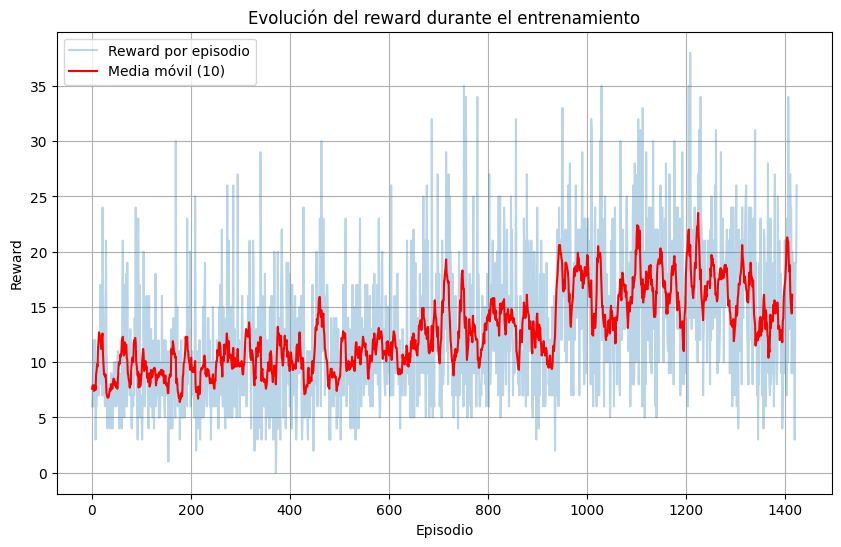

In [ ]:
# Leer los logs guardados
with open(log_filename) as f:
    log_data = json.load(f)

# Extraer rewards y episodios
episode_rewards = log_data['episode_reward']
episodes = list(range(1, len(episode_rewards) + 1))  # Episodios desde 1

# (Opcional) Suavizar la curva con media móvil
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

smoothed_rewards = moving_average(episode_rewards, window_size=10)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(episodes, episode_rewards, alpha=0.3, label='Reward por episodio')
plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, color='red', label='Media móvil (10)')
plt.xlabel('Episodio')
plt.ylabel('Reward')
plt.title('Evolución del reward durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---

Implementación de Boltzmann Policy


En lugar de una política ε-greedy (donde tomas la acción con el máximo Q o una aleatoria), usarías una distribución softmax sobre los Q-values para elegir la acción:

Ventajas:

Mejor exploración: elige buenas acciones con más probabilidad, incluso si no son la mejor.


In [ ]:
import numpy as np
import gym
import json
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Permute
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy  # Inclusión de nueva Policy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# ==== Constantes ====
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
ENV_NAME = 'SpaceInvaders-v0'

# ==== Procesador para observaciones ====
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# ==== Preparar entorno ====
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# ==== Modelo CNN tipo DeepMind ====
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=input_shape))  # (4, 84, 84) → (84, 84, 4)
model.add(Conv2D(32, kernel_size=8, strides=4, activation='relu'))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))

# ==== Memoria y política ====
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
policy = BoltzmannQPolicy()

# ==== Agente DQN ====
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               memory=memory,
               processor=AtariProcessor(),
               nb_steps_warmup=100000,
               target_model_update=10000,
               train_interval=1,
               gamma=0.99,
               policy=policy , enable_double_dqn= True)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

# ==== Callbacks ====
checkpoint_weights_filename = 'dqn_{}_weights_{{step}}.h5f'.format(ENV_NAME)
log_filename = 'dqn_{}_log.json'.format(ENV_NAME)
callbacks = [
    ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
    FileLogger(log_filename, interval=100)
]

# ==== Entrenamiento ====
dqn.fit(env,
        nb_steps=1000000,
        visualize=False,
        verbose=2,
        callbacks=callbacks)

# ==== Guardar pesos finales ====
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# ==== Evaluación ====
dqn.test(env, nb_episodes=20, visualize=False)


Training for 1000000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    652/1000000: episode: 1, duration: 2.637s, episode steps: 652, steps per second: 247, episode reward:  7.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.509 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   1241/1000000: episode: 2, duration: 2.295s, episode steps: 589, steps per second: 257, episode reward:  6.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.457 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   1842/1000000: episode: 3, duration: 2.449s, episode steps: 601, steps per second: 245, episode reward:  9.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.557 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   2480/1000000: episode: 4, duration: 2.578s, episode steps: 638, steps per second: 247, episode reward:  8.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.414 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   3167/1000000: episode: 5, duration: 2.671s, episode steps: 687, steps per second: 257, episode reward:  9.000, mean reward:  

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 100539/1000000: episode: 143, duration: 60.704s, episode steps: 1120, steps per second:  18, episode reward:  9.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 2.542 [0.000, 5.000],  loss: 0.006602, mae: 0.019897, mean_q: 0.027568
 101140/1000000: episode: 144, duration: 65.299s, episode steps: 601, steps per second:   9, episode reward:  7.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.567 [0.000, 5.000],  loss: 0.007076, mae: 0.022712, mean_q: 0.028241
 101772/1000000: episode: 145, duration: 68.756s, episode steps: 632, steps per second:   9, episode reward:  5.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 2.527 [0.000, 5.000],  loss: 0.007462, mae: 0.027476, mean_q: 0.035330
 102779/1000000: episode: 146, duration: 110.085s, episode steps: 1007, steps per second:   9, episode reward: 14.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.522 [0.000, 5.000],  loss: 0.007127, mae: 0.023465, mean_q: 0.028036
 103439/1000000: episode: 147, duration: 

KeyboardInterrupt: 

In [ ]:
import numpy as np
import gym
import json
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Permute
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# ==== Constantes ====
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
ENV_NAME = 'SpaceInvaders-v0'

# ==== Procesador mejorado ====
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (210, 160, 3)

        # Recortar área útil: quitar HUD y bordes
        cropped = observation[34:194, 8:152]  # Resulta en (160, 144, 3)

        # Redimensionar y convertir a escala de grises
        img = Image.fromarray(cropped)
        img = img.resize(INPUT_SHAPE).convert('L')  # Escala de grises 84x84

        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        # Promediar últimos 2 frames (mitiga flicker)
        averaged = 0.5 * batch[:, -1] + 0.5 * batch[:, -2]
        batch[:, -1] = averaged
        return batch.astype('float32') / 255.

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# ==== Preparar entorno ====
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# ==== Modelo CNN tipo DeepMind ====
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=input_shape))  # (4, 84, 84) → (84, 84, 4)
model.add(Conv2D(32, kernel_size=8, strides=4, activation='relu'))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))

# ==== Memoria y política ====
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
policy = BoltzmannQPolicy()

# ==== Agente DQN ====
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               memory=memory,
               processor=AtariProcessor(),
               nb_steps_warmup=50000,
               target_model_update=10000,
               train_interval=4,
               gamma=0.99,
               policy=policy,
               enable_double_dqn=True)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

# ==== Callbacks ====
checkpoint_weights_filename = 'dqn_{}_weights_{{step}}.h5f'.format(ENV_NAME)
log_filename = 'dqn_{}_log.json'.format(ENV_NAME)
callbacks = [
    ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
    FileLogger(log_filename, interval=100)
]

# ==== Entrenamiento ====
dqn.fit(env,
        nb_steps=1000000,
        visualize=False,
        verbose=2,
        callbacks=callbacks)

# ==== Guardar pesos finales ====
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# ==== Evaluación ====
dqn.test(env, nb_episodes=20, visualize=False)


Training for 1000000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    853/1000000: episode: 1, duration: 4.092s, episode steps: 853, steps per second: 208, episode reward: 12.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.547 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   1373/1000000: episode: 2, duration: 2.421s, episode steps: 520, steps per second: 215, episode reward:  4.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 2.388 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   1934/1000000: episode: 3, duration: 2.669s, episode steps: 561, steps per second: 210, episode reward:  9.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.595 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   2840/1000000: episode: 4, duration: 4.220s, episode steps: 906, steps per second: 215, episode reward: 15.000, mean reward:  0.017 [ 0.000,  1.000], mean action: 2.436 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   3464/1000000: episode: 5, duration: 2.921s, episode steps: 624, steps per second: 214, episode reward:  6.000, mean reward:  

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  51168/1000000: episode: 72, duration: 50.369s, episode steps: 1333, steps per second:  26, episode reward: 16.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.385 [0.000, 5.000],  loss: 0.006327, mae: 0.012898, mean_q: 0.017487
  52134/1000000: episode: 73, duration: 40.793s, episode steps: 966, steps per second:  24, episode reward: 11.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.449 [0.000, 5.000],  loss: 0.006161, mae: 0.010764, mean_q: 0.006768
  52624/1000000: episode: 74, duration: 20.605s, episode steps: 490, steps per second:  24, episode reward:  4.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 2.504 [0.000, 5.000],  loss: 0.005821, mae: 0.009911, mean_q: 0.006173
  53390/1000000: episode: 75, duration: 32.405s, episode steps: 766, steps per second:  24, episode reward: 11.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.479 [0.000, 5.000],  loss: 0.008093, mae: 0.012189, mean_q: 0.006051
  53915/1000000: episode: 76, duration: 22.288s

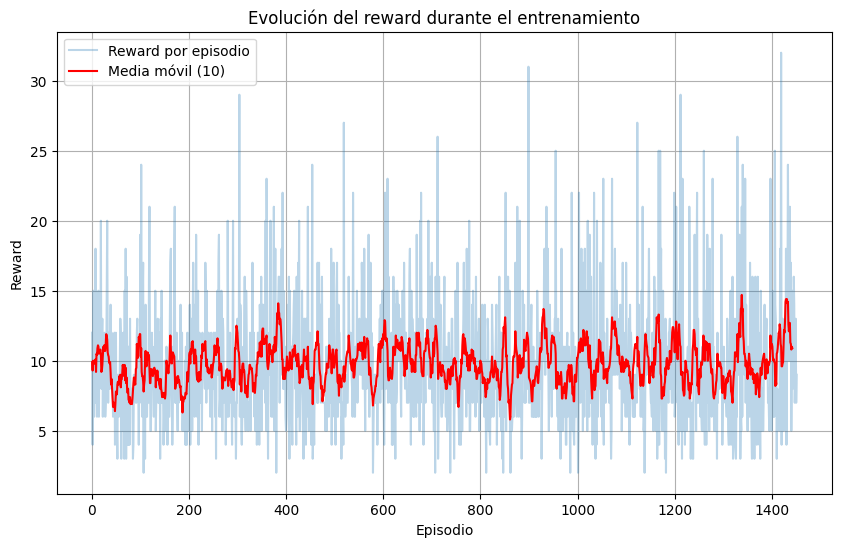

In [ ]:
# Leer los logs guardados
with open(log_filename) as f:
    log_data = json.load(f)

# Extraer rewards y episodios
episode_rewards = log_data['episode_reward']
episodes = list(range(1, len(episode_rewards) + 1))  # Episodios desde 1

# (Opcional) Suavizar la curva con media móvil
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

smoothed_rewards = moving_average(episode_rewards, window_size=10)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(episodes, episode_rewards, alpha=0.3, label='Reward por episodio')
plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, color='red', label='Media móvil (10)')
plt.xlabel('Episodio')
plt.ylabel('Reward')
plt.title('Evolución del reward durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import gym
import json
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Permute, Lambda
from tensorflow.keras.layers import Add, Subtract
from tensorflow.keras.optimizers.legacy import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# ==== Constantes ====
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
ENV_NAME = 'SpaceInvaders-v0'

# ==== Procesador ====
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (210, 160, 3)
        cropped = observation[34:194, 8:152]
        img = Image.fromarray(cropped).resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        averaged = 0.5 * batch[:, -1] + 0.5 * batch[:, -2]
        batch[:, -1] = averaged
        return batch.astype('float32') / 255.

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# ==== Entorno ====
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# ==== Modelo DUELING DQN ====
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
input_layer = Input(shape=input_shape)
x = Permute((2, 3, 1))(input_layer)
x = Conv2D(32, 8, strides=4, activation='relu')(x)
x = Conv2D(64, 4, strides=2, activation='relu')(x)
x = Conv2D(64, 3, strides=1, activation='relu')(x)
x = Flatten()(x)

# Stream for state value V(s)
v = Dense(512, activation='relu')(x)
v = Dense(1)(v)

# Stream for advantage A(s,a)
a = Dense(512, activation='relu')(x)
a = Dense(nb_actions)(a)

# Combine streams into Q-values: Q(s,a) = V(s) + (A(s,a) - mean(A))
q_values = Add()([v, Lambda(lambda a: a - K.mean(a, axis=1, keepdims=True))(a)])

model = Model(inputs=input_layer, outputs=q_values)
print(model.summary())

# ==== Memoria y política ====
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
policy = BoltzmannQPolicy()

# ==== Agente ====
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               memory=memory,
               processor=AtariProcessor(),
               nb_steps_warmup=50000,
               target_model_update=10000,
               train_interval=4,
               gamma=0.99,
               policy=policy,
               enable_double_dqn=True)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

# ==== Callbacks ====
checkpoint_weights_filename = 'dqn_{}_dueling_weights_{{step}}.h5f'.format(ENV_NAME)
log_filename = 'dqn_{}_dueling_log.json'.format(ENV_NAME)
callbacks = [
    ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
    FileLogger(log_filename, interval=100)
]

# ==== Entrenamiento ====
dqn.fit(env,
        nb_steps=1000000,
        visualize=False,
        verbose=2,
        callbacks=callbacks)

# ==== Guardar pesos ====
dqn.save_weights('dqn_{}_dueling_weights.h5f'.format(ENV_NAME), overwrite=True)

# ==== Evaluación ====
dqn.test(env, nb_episodes=20, visualize=False)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 84, 84)]  0           []                               
                                                                                                  
 permute (Permute)              (None, 84, 84, 4)    0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 20, 20, 32)   8224        ['permute[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 9, 9, 64)     32832       ['conv2d[0][0]']                 
                                                                                              

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    811/1000000: episode: 1, duration: 4.342s, episode steps: 811, steps per second: 187, episode reward: 12.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.543 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   1504/1000000: episode: 2, duration: 3.475s, episode steps: 693, steps per second: 199, episode reward: 11.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.437 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   2209/1000000: episode: 3, duration: 3.542s, episode steps: 705, steps per second: 199, episode reward:  9.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.509 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   2808/1000000: episode: 4, duration: 3.182s, episode steps: 599, steps per second: 188, episode reward: 10.000, mean reward:  0.017 [ 0.000,  1.000], mean action: 2.442 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   3362/1000000: episode: 5, duration: 2.917s, episode steps: 554, steps per second: 190, episode reward:  7.000, mean reward:  

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50205/1000000: episode: 77, duration: 12.421s, episode steps: 652, steps per second:  52, episode reward: 10.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.466 [0.000, 5.000],  loss: 0.004703, mae: 0.029020, mean_q: 0.035576
  50707/1000000: episode: 78, duration: 22.891s, episode steps: 502, steps per second:  22, episode reward:  4.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 2.418 [0.000, 5.000],  loss: 0.007499, mae: 0.031917, mean_q: 0.041329
  51832/1000000: episode: 79, duration: 51.973s, episode steps: 1125, steps per second:  22, episode reward: 18.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.379 [0.000, 5.000],  loss: 0.006788, mae: 0.029609, mean_q: 0.036791
  52806/1000000: episode: 80, duration: 44.987s, episode steps: 974, steps per second:  22, episode reward: 13.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.491 [0.000, 5.000],  loss: 0.008128, mae: 0.031272, mean_q: 0.039558
  53678/1000000: episode: 81, duration: 40.525s

KeyboardInterrupt: 

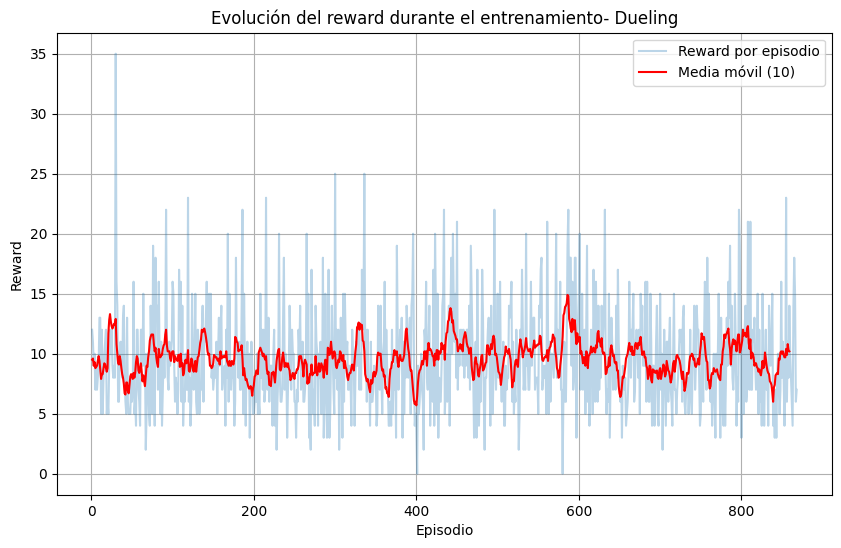

In [ ]:
# Leer los logs guardados
with open(log_filename) as f:
    log_data = json.load(f)

# Extraer rewards y episodios
episode_rewards = log_data['episode_reward']
episodes = list(range(1, len(episode_rewards) + 1))  # Episodios desde 1

# (Opcional) Suavizar la curva con media móvil
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

smoothed_rewards = moving_average(episode_rewards, window_size=10)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(episodes, episode_rewards, alpha=0.3, label='Reward por episodio')
plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, color='red', label='Media móvil (10)')
plt.xlabel('Episodio')
plt.ylabel('Reward')
plt.title('Evolución del reward durante el entrenamiento- Dueling')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import gym
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Lambda, Add, Permute
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor

# ==== Constantes ====
ENV_NAME = 'SpaceInvaders-v0'
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

# ==== Procesador ====
class AtariProcessor(Processor):
    def process_observation(self, observation):
        img = Image.fromarray(observation).resize(INPUT_SHAPE).convert('L')
        return np.array(img).astype('uint8')
    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.
    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# ==== Dueling CNN tipo DeepMind ====
def build_dueling_model(nb_actions, input_shape):
    inputs = Input(shape=input_shape)
    x = Permute((2, 3, 1))(inputs)
    x = Conv2D(32, 8, strides=4, activation='relu')(x)
    x = Conv2D(64, 4, strides=2, activation='relu')(x)
    x = Conv2D(64, 3, strides=1, activation='relu')(x)
    x = Flatten()(x)

    # Dueling streams
    value = Dense(512, activation='relu')(x)
    value = Dense(1)(value)

    advantage = Dense(512, activation='relu')(x)
    advantage = Dense(nb_actions)(advantage)

    # Combine streams
    advantage_mean = Lambda(lambda a: a - K.mean(a, axis=1, keepdims=True))(advantage)
    q_values = Add()([value, advantage_mean])

    return Model(inputs=inputs, outputs=q_values)

# ==== Preparar entorno ====
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

# ==== Modelo y agente ====
model = build_dueling_model(nb_actions, input_shape)

memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1.0, value_min=0.1, value_test=0.05,
                              nb_steps=250000)

dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               memory=memory,
               processor=AtariProcessor(),
               nb_steps_warmup=10000,
               enable_double_dqn=True,
               target_model_update=10000,
               policy=policy,
               train_interval=4,
               gamma=0.99)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

# ==== Entrenamiento rápido ====
dqn.fit(env,
        nb_steps=250000,
        visualize=False,
        verbose=2)

# ==== Guardar modelo ====
dqn.save_weights(f'dqn_{ENV_NAME}_dueling_double.h5f', overwrite=True)

# ==== Evaluación ====
history = dqn.test(env, nb_episodes=20, visualize=False)

# ==== Cálculo de promedio ====
rewards = [ep.history['episode_reward'][0] for ep in history]
mean_reward = np.mean(rewards)
print(f"\n🎯 Recompensa promedio sobre 20 episodios: {mean_reward:.2f}")


Training for 250000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    420/250000: episode: 1, duration: 1.972s, episode steps: 420, steps per second: 213, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.476 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    980/250000: episode: 2, duration: 2.419s, episode steps: 560, steps per second: 231, episode reward:  5.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.400 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1378/250000: episode: 3, duration: 1.835s, episode steps: 398, steps per second: 217, episode reward:  7.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.470 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2082/250000: episode: 4, duration: 2.991s, episode steps: 704, steps per second: 235, episode reward:  8.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.379 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2919/250000: episode: 5, duration: 3.472s, episode steps: 837, steps per 

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  10669/250000: episode: 15, duration: 23.581s, episode steps: 913, steps per second:  39, episode reward: 11.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.487 [0.000, 5.000],  loss: 0.006554, mae: 0.026671, mean_q: 0.040424, mean_eps: 0.962790
  11515/250000: episode: 16, duration: 27.458s, episode steps: 846, steps per second:  31, episode reward: 15.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.444 [0.000, 5.000],  loss: 0.006752, mae: 0.029585, mean_q: 0.042583, mean_eps: 0.960069
  12393/250000: episode: 17, duration: 28.883s, episode steps: 878, steps per second:  30, episode reward: 16.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.474 [0.000, 5.000],  loss: 0.007417, mae: 0.032610, mean_q: 0.047642, mean_eps: 0.956966
  13345/250000: episode: 18, duration: 30.809s, episode steps: 952, steps per second:  31, episode reward: 18.000, mean reward:  0.019 [ 0.000,  1.000], mean action: 2.527 [0.000, 5.000],  loss: 0.006727, mae: 0.032587, mean_q: 0

TypeError: 'History' object is not iterable

Training for 250000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    420/250000: episode: 1, duration: 1.746s, episode steps: 420, steps per second: 241, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.479 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    980/250000: episode: 2, duration: 2.239s, episode steps: 560, steps per second: 250, episode reward:  5.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.400 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1378/250000: episode: 3, duration: 1.620s, episode steps: 398, steps per second: 246, episode reward:  7.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.485 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2082/250000: episode: 4, duration: 2.803s, episode steps: 704, steps per second: 251, episode reward:  8.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.379 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2997/250000: episode: 5, duration: 3.605s, episode steps: 915, steps per 

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  51187/250000: episode: 72, duration: 39.572s, episode steps: 1474, steps per second:  37, episode reward: 18.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.531 [0.000, 5.000],  loss: 0.006931, mae: 0.027104, mean_q: -0.007060, mean_eps: 0.807743
  52408/250000: episode: 73, duration: 39.177s, episode steps: 1221, steps per second:  31, episode reward: 20.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.398 [0.000, 5.000],  loss: 0.007140, mae: 0.029669, mean_q: -0.014024, mean_eps: 0.803175
  52750/250000: episode: 74, duration: 10.971s, episode steps: 342, steps per second:  31, episode reward:  4.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.354 [0.000, 5.000],  loss: 0.005961, mae: 0.024196, mean_q: -0.012315, mean_eps: 0.800204
  53974/250000: episode: 75, duration: 39.550s, episode steps: 1224, steps per second:  31, episode reward: 22.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.578 [0.000, 5.000],  loss: 0.005618, mae: 0.028509, mea

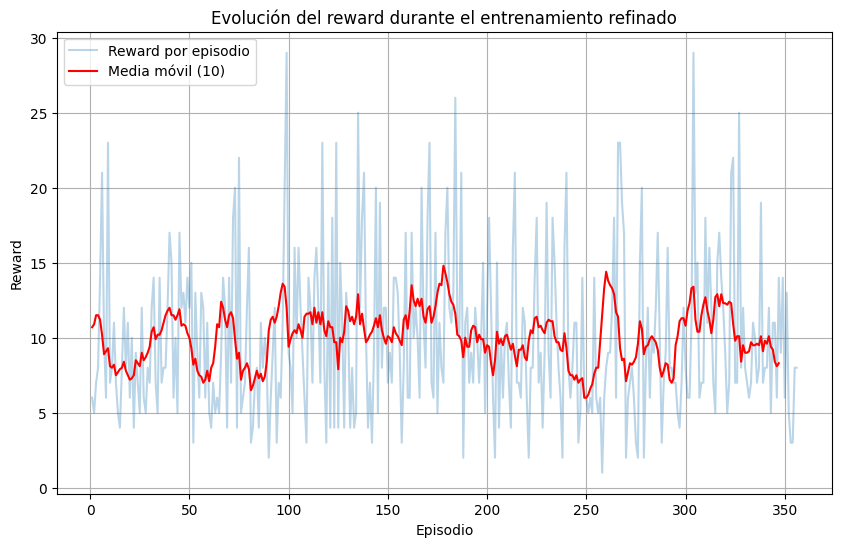

In [ ]:
import numpy as np
import gym
import json
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Lambda, Add, Permute
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# ==== Constantes ====
ENV_NAME = 'SpaceInvaders-v0'
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

# ==== Procesador de observaciones ====
class AtariProcessor(Processor):
    def process_observation(self, observation):
        img = Image.fromarray(observation).resize(INPUT_SHAPE).convert('L')
        return np.array(img).astype('uint8')
    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.
    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# ==== Modelo Dueling CNN ====
def build_dueling_model(nb_actions, input_shape):
    inputs = Input(shape=input_shape)
    x = Permute((2, 3, 1))(inputs)
    x = Conv2D(32, 8, strides=4, activation='relu')(x)
    x = Conv2D(64, 4, strides=2, activation='relu')(x)
    x = Conv2D(64, 3, strides=1, activation='relu')(x)
    x = Flatten()(x)

    # Dueling streams
    value = Dense(512, activation='relu')(x)
    value = Dense(1)(value)

    advantage = Dense(512, activation='relu')(x)
    advantage = Dense(nb_actions)(advantage)

    # Combine streams
    advantage_mean = Lambda(lambda a: a - K.mean(a, axis=1, keepdims=True))(advantage)
    q_values = Add()([value, advantage_mean])

    return Model(inputs=inputs, outputs=q_values)

# ==== Preparar entorno ====
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# ==== Modelo y Memoria ====
model = build_dueling_model(nb_actions, input_shape)
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

# ==== Política refinada ====
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1.0, value_min=0.05, value_test=0.01,
                              nb_steps=250000)

# ==== Agente DQN con hiperparámetros ajustados ====
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               memory=memory,
               processor=AtariProcessor(),
               nb_steps_warmup=50000,
               enable_double_dqn=True,
               target_model_update=30000,
               policy=policy,
               train_interval=4,
               gamma=0.995)

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae'])

# ==== Callbacks (opcional para guardar logs y pesos) ====
checkpoint_weights_filename = f'dqn_{ENV_NAME}_refined_weights_{{step}}.h5f'
log_filename = f'dqn_{ENV_NAME}_refined_log.json'
callbacks = [
    ModelIntervalCheckpoint(checkpoint_weights_filename, interval=100000),
    FileLogger(log_filename, interval=100)
]

# ==== ENTRENAMIENTO REFINADO (250k pasos) ====
dqn.fit(env,
        nb_steps=250000,
        visualize=False,
        verbose=2,
        callbacks=callbacks)

# ==== Guardar pesos finales ====
dqn.save_weights(f'dqn_{ENV_NAME}_dueling_double_refined.h5f', overwrite=True)

# ==== Evaluación (20 episodios) ====
history = dqn.test(env, nb_episodes=20, visualize=False)
rewards = history.history['episode_reward']
mean_reward = np.mean(rewards)
print(f"\n🎯 Recompensa promedio tras refinamiento: {mean_reward:.2f}")

# ==== GRAFICAR REWARDS (usando log si existe) ====
try:
    with open(log_filename) as f:
        log_data = json.load(f)

    episode_rewards = log_data['episode_reward']
    episodes = list(range(1, len(episode_rewards) + 1))

    def moving_average(data, window_size=10):
        return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

    smoothed_rewards = moving_average(episode_rewards)

    plt.figure(figsize=(10, 6))
    plt.plot(episodes, episode_rewards, alpha=0.3, label='Reward por episodio')
    plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, color='red', label='Media móvil (10)')
    plt.xlabel('Episodio')
    plt.ylabel('Reward')
    plt.title('Evolución del reward durante el entrenamiento refinado')
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print("No se pudo generar la gráfica. ¿Ejecutaste con `FileLogger` activado?")
    print(e)


# Comparación de DQN base y variantes (Double DQN, Dueling DQN, Boltzmann Policy)

## DQN con política ε-greedy (Baseline)
El Deep Q-Network (DQN) es un algoritmo de Aprendizaje por Refuerzo basado en Q-learning que usa una red neuronal para aproximar la función de valor Q(s, a). Su política de exploración ε-greedy consiste en:

- Con probabilidad ε: tomar una acción aleatoria (exploración).
- Con probabilidad 1-ε: tomar la mejor acción estimada (explotación).

**Arquitectura típica (DeepMind CNN):**
- 3 capas convolucionales (32, 64, 64 filtros).
- Flatten.
- Capa densa de 512 neuronas.
- Capa de salida con una neurona por acción (Q-values).

**Desventajas:**
- Tiende a **sobreestimar** los valores Q.
- No distingue entre la calidad del estado y la ventaja relativa de cada acción.
- La exploración aleatoria puede ser ineficiente.

---

##  Double DQN (Reducción de sobreestimación)
Double DQN soluciona la sobreestimación de Q-values presente en DQN tradicional. Separa el proceso de **selección** y **evaluación** de la acción siguiente:

- Selección con la red online: `argmax_a Q_online(s', a)`
- Evaluación con la red objetivo: `Q_target(s', argmax_a Q_online(s', a))`

Esto evita que un mismo valor inflado sea usado dos veces, estabilizando el entrenamiento.

 Mejora: aprendizaje más preciso y estable.

---

##  Dueling DQN (Arquitectura mejorada)
Dueling DQN introduce dos flujos en la red después de la capa de Flatten:

- **Value stream:** estima el valor del estado V(s)
- **Advantage stream:** estima la ventaja A(s, a) de cada acción

La salida se combina como:


$$
Q(s, a) = V(s) + \left( A(s, a) - \frac{1}{|\mathcal{A}|} \sum_{a'} A(s, a') \right)
$$

Esto permite que la red aprenda a evaluar el estado sin necesidad de aprender el valor de cada acción en cada paso, lo que mejora la eficiencia del entrenamiento, especialmente cuando muchas acciones tienen efectos similares.

✅ Mejora: eficiencia y generalización en estados complejos.

---

## 🔥 Boltzmann Policy (Exploración suave)
En lugar de usar ε-greedy, se emplea una política **Boltzmann (softmax)** que asigna probabilidades de acción basadas en sus Q-values:

$$
P(a|s) = \frac{e^{Q(s,a)/\tau}}{\sum_{a'} e^{Q(s,a')/\tau}}
$$

Donde **τ** es la *temperatura*, que regula cuán aleatoria es la elección:

- τ alto → exploración aleatoria
- τ bajo → elección más determinista

✅ Mejora: exploración más informada y gradual que ε-greedy.

---

Combinaciones posibles y su justificación

### 🔹 Double DQN + Dueling DQN
Esta combinación une dos mejoras clave sobre el DQN clásico:

- **Double DQN** reduce el sesgo de sobreestimación en los valores Q. Utiliza una red para seleccionar la acción y otra para evaluar su valor. Esto hace que el entrenamiento sea más **estable** y los valores Q más **realistas**.
  
- **Dueling DQN** separa la estimación del **valor del estado** `V(s)` y la **ventaja de cada acción** `A(s,a)`, lo cual permite que el agente aprenda a evaluar mejor situaciones donde las acciones no tienen gran impacto diferencial.

✅ **Ventaja combinada:**  
Reduce el ruido en la estimación de Q y mejora la representación interna del estado. Es una de las configuraciones más comunes en entornos como Atari.

---

### 🔹 Boltzmann Policy + Double/Dueling
En vez de usar ε-greedy, esta combinación reemplaza la política de exploración por una **política Boltzmann**, que elige acciones con una probabilidad proporcional a sus valores Q:

$$
P(a|s) = \frac{e^{Q(s,a)/\tau}}{\sum_{a'} e^{Q(s,a')/\tau}}
$$

Donde `τ` (temperatura) regula la aleatoriedad:
- Alta `τ` ⇒ más exploración (acciones casi igual de probables)
- Baja `τ` ⇒ más explotación (acción con mayor Q domina)

 Cuando se combina con **Double DQN o Dueling DQN**, se obtiene:
- Exploración **más informada** que ε-greedy
- Aprovechamiento de estimaciones Q **más estables o estructuradas**
- Puede acelerar la convergencia en ciertos entornos

 Pero **puede ser sensible a la elección de τ** y no siempre mejora el rendimiento frente a ε-greedy sin buen ajuste.

---

 En resumen, la combinación de:
- **Double DQN + Dueling + ε-greedy** → sólida, estándar, robusta  
- **Double DQN + Dueling + Boltzmann** → exploración más sofisticada, pero requiere tuning de temperatura

Training for 500000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    420/500000: episode: 1, duration: 2.606s, episode steps: 420, steps per second: 161, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.476 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    980/500000: episode: 2, duration: 4.530s, episode steps: 560, steps per second: 124, episode reward:  5.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.400 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1378/500000: episode: 3, duration: 2.631s, episode steps: 398, steps per second: 151, episode reward:  7.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.475 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2082/500000: episode: 4, duration: 4.181s, episode steps: 704, steps per second: 168, episode reward:  8.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.379 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2919/500000: episode: 5, duration: 5.756s, episode steps: 837, steps per 

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50541/500000: episode: 71, duration: 38.235s, episode steps: 658, steps per second:  17, episode reward:  6.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.602 [0.000, 5.000],  loss: 0.007592, mae: 0.018799, mean_q: 0.017192, mean_eps: 0.808966
  51560/500000: episode: 72, duration: 68.436s, episode steps: 1019, steps per second:  15, episode reward: 13.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.638 [0.000, 5.000],  loss: 0.005576, mae: 0.014946, mean_q: 0.007157, mean_eps: 0.806010
  52243/500000: episode: 73, duration: 45.281s, episode steps: 683, steps per second:  15, episode reward: 10.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.611 [0.000, 5.000],  loss: 0.006668, mae: 0.014170, mean_q: 0.007442, mean_eps: 0.802780
  52945/500000: episode: 74, duration: 47.635s, episode steps: 702, steps per second:  15, episode reward: 11.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.611 [0.000, 5.000],  loss: 0.007138, mae: 0.017035, mean_q: 

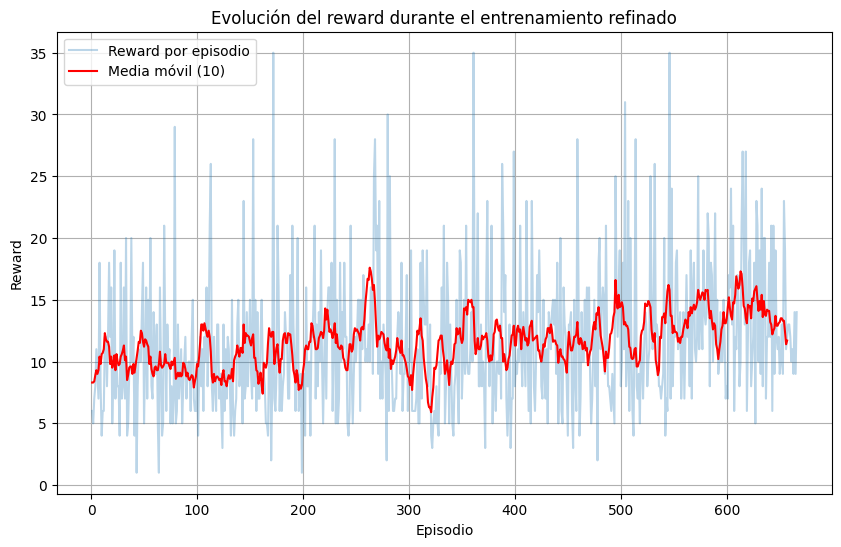

In [ ]:
import numpy as np
import gym
import json
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Lambda, Add, Permute
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# ==== Constantes ====
ENV_NAME = 'SpaceInvaders-v0'
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

# ==== Procesador de observaciones ====
class AtariProcessor(Processor):
    def process_observation(self, observation):
        img = Image.fromarray(observation).resize(INPUT_SHAPE).convert('L')
        return np.array(img).astype('uint8')
    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.
    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# ==== Modelo Dueling CNN ====
def build_dueling_model(nb_actions, input_shape):
    inputs = Input(shape=input_shape)
    x = Permute((2, 3, 1))(inputs)
    x = Conv2D(32, 8, strides=4, activation='relu')(x)
    x = Conv2D(64, 4, strides=2, activation='relu')(x)
    x = Conv2D(64, 3, strides=1, activation='relu')(x)
    x = Flatten()(x)

    # Dueling streams
    value = Dense(512, activation='relu')(x)
    value = Dense(1)(value)

    advantage = Dense(512, activation='relu')(x)
    advantage = Dense(nb_actions)(advantage)

    # Combine streams
    advantage_mean = Lambda(lambda a: a - K.mean(a, axis=1, keepdims=True))(advantage)
    q_values = Add()([value, advantage_mean])

    return Model(inputs=inputs, outputs=q_values)

# ==== Preparar entorno ====
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# ==== Modelo y Memoria ====
model = build_dueling_model(nb_actions, input_shape)
memory = SequentialMemory(limit=2000000, window_length=WINDOW_LENGTH)

# ==== Política refinada ====
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1.0, value_min=0.05, value_test=0.01,
                              nb_steps=250000)

# ==== Agente DQN con hiperparámetros ajustados ====
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               memory=memory,
               processor=AtariProcessor(),
               nb_steps_warmup=50000,
               enable_double_dqn=True,
               target_model_update=50000,
               policy=policy,
               train_interval=4,
               gamma=0.995)

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae'])

# ==== Callbacks (opcional para guardar logs y pesos) ====
checkpoint_weights_filename = f'dqn_{ENV_NAME}_refined_weights_{{step}}.h5f'
log_filename = f'dqn_{ENV_NAME}_refined_log.json'
callbacks = [
    ModelIntervalCheckpoint(checkpoint_weights_filename, interval=100000),
    FileLogger(log_filename, interval=100)
]

# ==== ENTRENAMIENTO REFINADO (500k pasos) ====
dqn.fit(env,
        nb_steps=500000,
        visualize=False,
        verbose=2,
        callbacks=callbacks)

# ==== Guardar pesos finales ====
dqn.save_weights(f'dqn_{ENV_NAME}_dueling_double_refined.h5f', overwrite=True)

# ==== Evaluación (20 episodios) ====
history = dqn.test(env, nb_episodes=20, visualize=False)
rewards = history.history['episode_reward']
mean_reward = np.mean(rewards)
print(f"\n🎯 Recompensa promedio tras refinamiento: {mean_reward:.2f}")

# ==== GRAFICAR REWARDS (usando log si existe) ====
try:
    with open(log_filename) as f:
        log_data = json.load(f)

    episode_rewards = log_data['episode_reward']
    episodes = list(range(1, len(episode_rewards) + 1))

    def moving_average(data, window_size=10):
        return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

    smoothed_rewards = moving_average(episode_rewards)

    plt.figure(figsize=(10, 6))
    plt.plot(episodes, episode_rewards, alpha=0.3, label='Reward por episodio')
    plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, color='red', label='Media móvil (10)')
    plt.xlabel('Episodio')
    plt.ylabel('Reward')
    plt.title('Evolución del reward durante el entrenamiento refinado')
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print("No se pudo generar la gráfica. ¿Ejecutaste con `FileLogger` activado?")
    print(e)


Training for 250000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    420/250000: episode: 1, duration: 1.903s, episode steps: 420, steps per second: 221, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.476 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    980/250000: episode: 2, duration: 2.387s, episode steps: 560, steps per second: 235, episode reward:  5.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.400 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1378/250000: episode: 3, duration: 1.677s, episode steps: 398, steps per second: 237, episode reward:  7.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.477 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2082/250000: episode: 4, duration: 2.871s, episode steps: 704, steps per second: 245, episode reward:  8.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.379 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2919/250000: episode: 5, duration: 3.521s, episode steps: 837, steps per 

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50636/250000: episode: 75, duration: 20.992s, episode steps: 984, steps per second:  47, episode reward: 14.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.553 [0.000, 5.000],  loss: 0.006419, mae: 0.023217, mean_q: 0.041597, mean_eps: 0.808792
  51319/250000: episode: 76, duration: 20.582s, episode steps: 683, steps per second:  33, episode reward: 11.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.455 [0.000, 5.000],  loss: 0.006452, mae: 0.023202, mean_q: 0.036921, mean_eps: 0.806291
  51672/250000: episode: 77, duration: 10.659s, episode steps: 353, steps per second:  33, episode reward:  3.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 2.371 [0.000, 5.000],  loss: 0.007224, mae: 0.026601, mean_q: 0.036748, mean_eps: 0.804323
  52075/250000: episode: 78, duration: 12.132s, episode steps: 403, steps per second:  33, episode reward:  4.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.362 [0.000, 5.000],  loss: 0.005617, mae: 0.021662, mean_q: 0

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    397/250000: episode: 1, duration: 1.982s, episode steps: 397, steps per second: 200, episode reward:  2.000, mean reward:  0.005 [ 0.000,  1.000], mean action: 2.516 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   1165/250000: episode: 2, duration: 3.597s, episode steps: 768, steps per second: 213, episode reward:  8.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.473 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   1904/250000: episode: 3, duration: 3.424s, episode steps: 739, steps per second: 216, episode reward: 10.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.571 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   2681/250000: episode: 4, duration: 3.654s, episode steps: 777, steps per second: 213, episode reward: 11.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.448 [0.000, 5.000],  loss: --, mae: --, mean_q: --
   4230/250000: episode: 5, duration: 7.158s, episode steps: 1549, steps per second: 216, episode reward: 25.000, mean reward:  0.01

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  51020/250000: episode: 69, duration: 33.828s, episode steps: 1343, steps per second:  40, episode reward: 19.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.416 [0.000, 5.000],  loss: 0.006500, mae: 0.045772, mean_q: 0.071469
  51660/250000: episode: 70, duration: 19.810s, episode steps: 640, steps per second:  32, episode reward:  8.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.388 [0.000, 5.000],  loss: 0.005837, mae: 0.045433, mean_q: 0.063795
  52729/250000: episode: 71, duration: 33.073s, episode steps: 1069, steps per second:  32, episode reward: 22.000, mean reward:  0.021 [ 0.000,  1.000], mean action: 2.475 [0.000, 5.000],  loss: 0.006764, mae: 0.046869, mean_q: 0.065199
  53915/250000: episode: 72, duration: 36.452s, episode steps: 1186, steps per second:  33, episode reward: 20.000, mean reward:  0.017 [ 0.000,  1.000], mean action: 2.515 [0.000, 5.000],  loss: 0.006890, mae: 0.047224, mean_q: 0.065581
  54403/250000: episode: 73, duration: 14.982s, e

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    420/250000: episode: 1, duration: 1.916s, episode steps: 420, steps per second: 219, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.486 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    980/250000: episode: 2, duration: 2.489s, episode steps: 560, steps per second: 225, episode reward:  5.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.400 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1378/250000: episode: 3, duration: 1.659s, episode steps: 398, steps per second: 240, episode reward:  7.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.485 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2082/250000: episode: 4, duration: 2.942s, episode steps: 704, steps per second: 239, episode reward:  8.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.379 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2977/250000: episode: 5, duration: 3.772s, episode steps: 895, steps per 

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50812/250000: episode: 74, duration: 26.049s, episode steps: 821, steps per second:  32, episode reward: 10.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.665 [0.000, 5.000],  loss: 0.008291, mae: 0.034142, mean_q: 0.056889, mean_eps: 0.808457
  51328/250000: episode: 75, duration: 16.173s, episode steps: 516, steps per second:  32, episode reward:  7.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.391 [0.000, 5.000],  loss: 0.009399, mae: 0.041528, mean_q: 0.060406, mean_eps: 0.805942
  51710/250000: episode: 76, duration: 11.840s, episode steps: 382, steps per second:  32, episode reward:  2.000, mean reward:  0.005 [ 0.000,  1.000], mean action: 2.552 [0.000, 5.000],  loss: 0.008878, mae: 0.040473, mean_q: 0.057225, mean_eps: 0.804232
  52901/250000: episode: 77, duration: 37.116s, episode steps: 1191, steps per second:  32, episode reward: 12.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.386 [0.000, 5.000],  loss: 0.007661, mae: 0.034456, mean_q: 

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    420/250000: episode: 1, duration: 2.166s, episode steps: 420, steps per second: 194, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.476 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
    980/250000: episode: 2, duration: 2.499s, episode steps: 560, steps per second: 224, episode reward:  5.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.400 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1378/250000: episode: 3, duration: 1.774s, episode steps: 398, steps per second: 224, episode reward:  7.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.470 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2082/250000: episode: 4, duration: 3.178s, episode steps: 704, steps per second: 222, episode reward:  8.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.379 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2919/250000: episode: 5, duration: 3.762s, episode steps: 837, steps per 

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50743/250000: episode: 72, duration: 25.646s, episode steps: 826, steps per second:  32, episode reward: 11.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.558 [0.000, 5.000],  loss: 0.007575, mae: 0.031226, mean_q: -0.011184, mean_eps: 0.808586
  51542/250000: episode: 73, duration: 26.107s, episode steps: 799, steps per second:  31, episode reward: 10.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.158 [0.000, 5.000],  loss: 0.007909, mae: 0.027791, mean_q: -0.012915, mean_eps: 0.805660
  52058/250000: episode: 74, duration: 16.649s, episode steps: 516, steps per second:  31, episode reward:  8.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.620 [0.000, 5.000],  loss: 0.007113, mae: 0.029134, mean_q: -0.021130, mean_eps: 0.803160
  52491/250000: episode: 75, duration: 13.907s, episode steps: 433, steps per second:  31, episode reward:  5.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.517 [0.000, 5.000],  loss: 0.007803, mae: 0.030449, mean_q

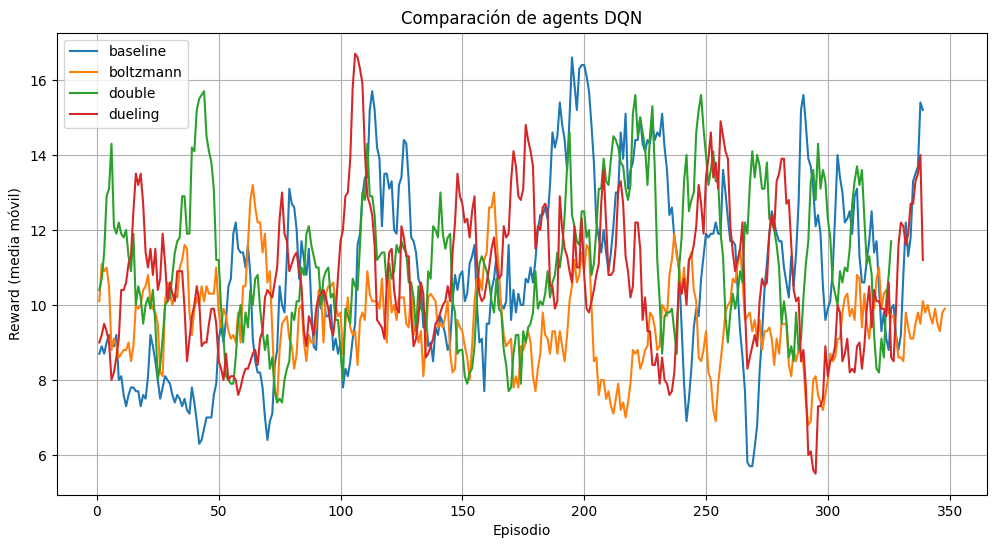

In [ ]:
# Comparación de agentes: DQN baseline, Boltzmann, Double DQN, Dueling DQN

import numpy as np
import gym
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Lambda, Add, Permute
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy, BoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# === Constantes ===
ENV_NAME = 'SpaceInvaders-v0'
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

dqn_variants = {
    'baseline': {'double_dqn': False, 'dueling': False, 'policy': EpsGreedyQPolicy()},
    'boltzmann': {'double_dqn': False, 'dueling': False, 'policy': BoltzmannQPolicy()},
    'double': {'double_dqn': True, 'dueling': False, 'policy': EpsGreedyQPolicy()},
    'dueling': {'double_dqn': True, 'dueling': True, 'policy': EpsGreedyQPolicy()}
}

class AtariProcessor(Processor):
    def process_observation(self, observation):
        img = Image.fromarray(observation).resize(INPUT_SHAPE).convert('L')
        return np.array(img).astype('uint8')

    def process_state_batch(self, batch):
        return batch.astype('float32') / 255.

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

def build_model(nb_actions, input_shape, dueling=False):
    inputs = Input(shape=input_shape)
    x = Permute((2, 3, 1))(inputs)
    x = Conv2D(32, 8, strides=4, activation='relu')(x)
    x = Conv2D(64, 4, strides=2, activation='relu')(x)
    x = Conv2D(64, 3, strides=1, activation='relu')(x)
    x = Flatten()(x)

    if dueling:
        value = Dense(512, activation='relu')(x)
        value = Dense(1)(value)

        advantage = Dense(512, activation='relu')(x)
        advantage = Dense(nb_actions)(advantage)

        advantage_mean = Lambda(lambda a: a - K.mean(a, axis=1, keepdims=True))(advantage)
        q_values = Add()([value, advantage_mean])
    else:
        q_values = Dense(512, activation='relu')(x)
        q_values = Dense(nb_actions)(q_values)

    return Model(inputs=inputs, outputs=q_values)

def run_agent(name, config):
    env = gym.make(ENV_NAME)
    np.random.seed(123)
    env.seed(123)
    nb_actions = env.action_space.n

    model = build_model(nb_actions, input_shape, dueling=config['dueling'])
    memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

    if isinstance(config['policy'], EpsGreedyQPolicy):
        policy = LinearAnnealedPolicy(config['policy'], attr='eps', value_max=1.0, value_min=0.05,
                                       value_test=0.01, nb_steps=250000)
    else:
        policy = config['policy']

    agent = DQNAgent(model=model, nb_actions=nb_actions, memory=memory,
                     processor=AtariProcessor(), nb_steps_warmup=50000,
                     enable_double_dqn=config['double_dqn'],
                     target_model_update=50000, policy=policy, train_interval=4, gamma=0.995)

    agent.compile(Adam(learning_rate=1e-4), metrics=['mae'])

    # Callbacks y logs
    weights_file = f'{name}_weights.h5f'
    log_file = f'{name}_log.json'
    callbacks = [
        ModelIntervalCheckpoint(f'{name}_weights_{{step}}.h5f', interval=100000),
        FileLogger(log_file, interval=100)
    ]

    agent.fit(env, nb_steps=250000, visualize=False, verbose=2, callbacks=callbacks)

    agent.save_weights(weights_file, overwrite=True)
    history = agent.test(env, nb_episodes=20, visualize=False)
    rewards = history.history['episode_reward']
    print(f"{name.upper()} --> Reward promedio: {np.mean(rewards):.2f}")

    return log_file

# Ejecutar todos los agentes
log_files = {}
for name, config in dqn_variants.items():
    log_files[name] = run_agent(name, config)

# Graficar resultados
plt.figure(figsize=(12, 6))
for name, log_file in log_files.items():
    with open(log_file) as f:
        log = json.load(f)
        rewards = log['episode_reward']
        episodes = list(range(1, len(rewards) + 1))
        ma = np.convolve(rewards, np.ones(10)/10, mode='valid')
        plt.plot(episodes[:len(ma)], ma, label=name)

plt.title("Comparación de agents DQN")
plt.xlabel("Episodio")
plt.ylabel("Reward (media móvil)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
!pip install stable-baselines3[extra]
!pip install sb3-contrib
!pip install gym[atari,accept-rom-license]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 21.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-